In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('data/combined_subsets.csv')

In [2]:
data_no_null = data.dropna()
data_no_null.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,0,228.69,36.6,1,1
1,31112,1,80.0,0,1,1,0,1,105.92,32.5,0,1
2,60182,0,49.0,0,0,1,0,0,171.23,34.4,2,1
3,1665,0,79.0,1,0,1,1,1,174.12,24.0,0,1
4,56669,1,81.0,0,0,1,0,0,186.21,29.0,1,1


# K Nearest Neighbor (KNN)

In [16]:
y = data_no_null['stroke']
target_names = ['0', '1']

X = data_no_null.drop('stroke', axis=1).drop('id',axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,0,0,228.69,36.6,1
1,1,80.0,0,1,1,0,1,105.92,32.5,0
2,0,49.0,0,0,1,0,0,171.23,34.4,2
3,0,79.0,1,0,1,1,1,174.12,24.0,0
4,1,81.0,0,0,1,0,0,186.21,29.0,1


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

k: 1, Train/Test Score: 1.000/0.965
k: 3, Train/Test Score: 0.982/0.982
k: 5, Train/Test Score: 0.980/0.983
k: 7, Train/Test Score: 0.980/0.984
k: 9, Train/Test Score: 0.980/0.984
k: 11, Train/Test Score: 0.980/0.984
k: 13, Train/Test Score: 0.980/0.984
k: 15, Train/Test Score: 0.980/0.984
k: 17, Train/Test Score: 0.980/0.984
k: 19, Train/Test Score: 0.980/0.984


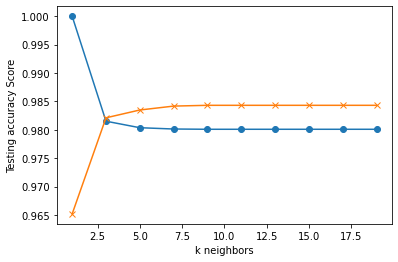

In [18]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot score results for training and test sets for each k=N    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
# Print test score for best k
# k: 5 appears to be best (scores plateau at 5)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Test Acc: 0.984


In [ ]:
# input test values for prediction
# order of inputs:
# Gender (Female=0,Male=1,Other=2)
# Age (actual value)
# Hypertension (No=0,Yes=1)
# Heart Diserase (No=0,Yes=1)
# Married (No=0,Yes=1)
# Work Type (Private=0,Self-employed=1,children=2,Govt_job=3,Never_worked=4")
# Residence Type (Urban=0,Rural=1)
# Average Glucose (actual value)
# BMI (actual value)
# Smoking (never smoked=0,formerly smoked=1,smokes=2,unkown=3)

# output values
# have had stroke (No=0,Yes=1)

In [21]:
sample = [[1,27,0,0,0,0,0,100,29,1]]
prediction = knn.predict(sample)
print(prediction)

[0]


# Support Vector Machines (SVM)